In [1]:
import keras
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import cv2
import glob2
from PIL import Image
import pandas as pd

Using TensorFlow backend.


In [2]:
from keras.applications.vgg16 import VGG16,preprocess_input,decode_predictions
from keras.preprocessing.image import load_img,img_to_array
import sys
import shutil

In [3]:
#Initiating a Model Object
model=VGG16()

Instructions for updating:
Colocations handled automatically by placer.


In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [5]:
path='C:\\Users\\719475\\Downloads\\final_data'

In [6]:
os.chdir(path)
#Target Size for Input Image
target_size=(224,224)

In [7]:
os.getcwd()

'C:\\Users\\719475\\Downloads\\final_data'

In [21]:
#Reshaping the Images as 224*224
for f in os.listdir('.'):
    if f.endswith('.jpg'):
        i = Image.open(f)
        fn,fext = os.path.splitext(f)
        
        i.thumbnail(target_size)
        i.save('target/{}_224{}'.format(fn,fext))    

In [244]:
type(i)

PIL.JpegImagePlugin.JpegImageFile

In [23]:
target_path='C:\\Users\\719475\\Downloads\\final_data\\target'
os.chdir(target_path)
os.getcwd()

'C:\\Users\\719475\\Downloads\\final_data\\target'

In [126]:
#Loading the Images 
n=[]
x=[]
a=[]
for img in os.listdir(target_path):
    a.append(os.path.join(target_path, img))
    
for i in range(len(a)):
    n.append(keras.preprocessing.image.load_img(a[i], target_size=(224, 224))) 

OSError: cannot identify image file 'C:\\Users\\719475\\Downloads\\final_data\\target\\abc.txt'

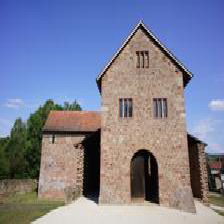

In [25]:
n[570]

In [26]:
#Target Folders
l=['acoustic','airliner','arabian','chihuahua','church','german','laptop','tabby','violin']

In [27]:
#Making Directories
for i in range(len(l)):
    os.mkdir(l[i])

In [28]:
#Preprocessing,Predicting and Decoding the images
y=[]
z=[]
x=[]
preds=[]
out=[]
label=[]
for i in range(len(n)):
    x.append(keras.preprocessing.image.img_to_array(n[i]))
    y.append(np.expand_dims(x[i], axis=0))
    z.append(preprocess_input(y[i]))
    preds.append(model.predict(z[i]))  
    label.append(keras.applications.vgg16.decode_predictions(preds[i]))

In [30]:
#Moving the images in desired folders as per the classes
for i in range(len(label)):
    if label[i][0][0][1]=='acoustic_guitar':
        shutil.copy(a[i],l[0])
    elif label[i][0][0][1]=='airliner':
        shutil.copy(a[i],l[1])
    elif label[i][0][0][1]=='Arabian_camel':
        shutil.copy(a[i],l[2])
    elif label[i][0][0][1]=='Chihuahua':
        shutil.copy(a[i],l[3])
    elif label[i][0][0][1]=='church':
        shutil.copy(a[i],l[4])
    elif label[i][0][0][1]=='German_shepherd':
        shutil.copy(a[i],l[5])
    elif label[i][0][0][1]=='laptop':
        shutil.copy(a[i],l[6])
    elif label[i][0][0][1]=='tabby':
        shutil.copy(a[i],l[7])
    elif label[i][0][0][1]=='violin':
        shutil.copy(a[i],l[8])

In [143]:
#Creating a combined list of image and class
h=[]
for i in range(len(label)):
    if label[i][0][0][1]=='acoustic_guitar':
        h.append([a[i],l[0]])
    elif label[i][0][0][1]=='airliner':
        h.append([a[i],l[1]])
    elif label[i][0][0][1]=='Arabian_camel':
        h.append([a[i],l[2]])
    elif label[i][0][0][1]=='Chihuahua':
        h.append([a[i],l[3]])
    elif label[i][0][0][1]=='church':
        h.append([a[i],l[4]])
    elif label[i][0][0][1]=='German_shepherd':
        h.append([a[i],l[5]])
    elif label[i][0][0][1]=='laptop':
        h.append([a[i],l[6]])
    elif label[i][0][0][1]=='tabby':
        h.append([a[i],l[7]])
    elif label[i][0][0][1]=='violin':
        h.append([a[i],l[8]])

In [157]:
#Creating Dataframe
df = pd.DataFrame(h,columns=['File','Folder'])
df

,File,Folder
0,C:\Users\719475\Downloads\final_data\target\10...,violin
1,C:\Users\719475\Downloads\final_data\target\10...,airliner
2,C:\Users\719475\Downloads\final_data\target\10...,laptop
3,C:\Users\719475\Downloads\final_data\target\10...,violin
4,C:\Users\719475\Downloads\final_data\target\11...,tabby
5,C:\Users\719475\Downloads\final_data\target\11...,tabby
6,C:\Users\719475\Downloads\final_data\target\11...,chihuahua
7,C:\Users\719475\Downloads\final_data\target\11...,airliner
8,C:\Users\719475\Downloads\final_data\target\11...,airliner
9,C:\Users\719475\Downloads\final_data\target\11...,airliner


In [159]:
#Creating CSV
target_file=df.to_csv('target_file.csv')